# Run DNN_DB_Spectrogram.py to classify the English digits in EDB. Copy and paste the CM and PEG value.

In [20]:
# Cross Validation Classification Confusion Matrix
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt 


DNN_CDB_Spectrogram
Enter Chinese (C) or English (E)  E
dataset shape=  (2100, 785)
Number of Hidden layers= 2
Number of nodes/layer= 16


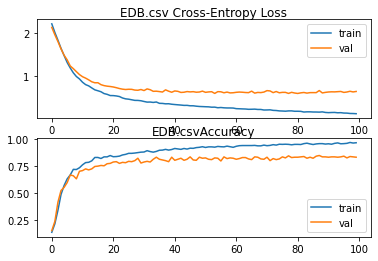


EDB.csv CM=
 [[ 88   0   4   1   1   0   2   3   1   3]
 [  0  94   0   0   2   2   1   0   0   3]
 [  2   0  75   3   5   1   2   2   7   0]
 [  0   0   2 103   0   1   3   0   2   1]
 [  3   6   0   0  97   0   0   0   0   0]
 [  2  15   2   0   0  88   1   2   0   4]
 [  0   0   2   0   0   0  90   2   5   0]
 [  1   1   1   1   0   0   5 101   0   1]
 [  0   0   2   2   0   0  12   0  77   0]
 [  1  10   0   2   0  10   1   2   1  86]]

EDB.csv Nerr= 151

EDB.csv Ntotal= 1050

EDB.csv PEG= 0.1438


In [60]:
print('\nDNN_CDB_Spectrogram')
Language = input('Enter Chinese (C) or English (E)  ')
filename = Language + 'DB.csv'
dataset = np.loadtxt(filename, delimiter=',',dtype=float)
np.random.shuffle(dataset)
print('dataset shape= ',dataset.shape)
X = dataset[:,1:785]
y = dataset[:,0]

# split into train and test sets
rows = y.shape[0]
n_train = int(.5*rows)  # 50% of data into training set  25% into validation set
Xtrain, Xtest = X[:n_train, :], X[n_train:, :]
ytrain, ytest = y[:n_train], y[n_train:]
 

def DNNfit(Nfeatures, Xtrain, ytrain):  
    
# Nepochs times Nsamples should be about 1E6  (million!)
    Nlayers = int(input('Number of Hidden layers= '))
    Nnodes = int(input('Number of nodes/layer= '))
      
    Nepochs = 100
    
    model = Sequential()

# first hidden layer
    model.add(Dense(Nnodes, input_dim=Nfeatures, activation='relu'))

# additional hidden layers    
    for n in range(Nlayers-1):  # first hidden layer is previous statement
        model.add(Dense(Nnodes, activation='relu'))

# output layer
    model.add(Dense(10, activation='softmax'))     
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', metrics=['accuracy'])
     
    ytrain_onehot = to_categorical(ytrain)
    history = model.fit(Xtrain, ytrain_onehot, 
                  validation_split= .3, 
                  epochs = Nepochs, verbose=0)
    return model, history
 
def DNNevaluate(model,Xtest,ytest):  # computes CM and PE for test set
    Ntest = Xtest.shape[0] # number of rows
    CM = np.zeros([10,10], dtype = int)
    ypred = model.predict(Xtest) # predicts entire set
    for i in range(Ntest):
        yclass = np.argmax(ypred[i])   
        ytrue = int(ytest[i])
        CM[ytrue,yclass] += 1

    Nerr = sum(sum(CM))-np.trace(CM)
    Ntotal = sum(sum(CM))
    PE = Nerr/Ntotal
    return Nerr, Ntotal,CM, PE


Nfeatures = 784
model, history = DNNfit(Nfeatures, Xtrain, ytrain)   
# plot loss learning curves
plt.subplot(211)
plt.title(filename + ' Cross-Entropy Loss', pad=-40)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
# plot accuracy learning curves
plt.subplot(212)
plt.title(filename + 'Accuracy', pad=-40)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()
plt.show()



Nerr, Ntotal, CM, PE = DNNevaluate(model,Xtest,ytest)
print('\n' + filename + ' CM=\n', CM)
print('\n' + filename + ' Nerr= %d' % Nerr)
print('\n' + filename + ' Ntotal= %d' % Ntotal)
print('\n' + filename + ' PEG= %.4f' % PE)

# Modify your name_Lec5 HW1.py by specifying the DNN structure (Nlay- ers, Nnodes, and Nepochs) that reduces the PEGs. Copy and paste the CM and PEG value.

Number of Hidden layers= 1
Number of nodes/layer= 30


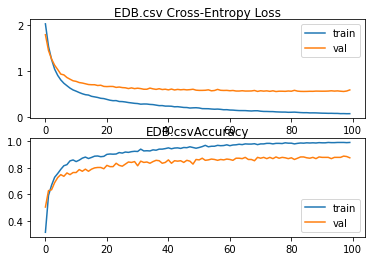


EDB.csv CM=
 [[ 82   0   6   3   1   1   1   0   1   2]
 [  0  92   0   0   4   5   0   2   0   2]
 [  1   0  84   5   3   1   0   0   1   0]
 [  0   0   0 101   0   1   0   0   2   0]
 [  0   1   1   0  98   0   0   0   1   1]
 [  0   4   1   0   3  97   2   1   0  11]
 [  0   0   7   3   0   1  86   0   9   0]
 [  1   0   9   0   0   2   3  91   2   4]
 [  0   0   4   2   0   0   2   0  91   0]
 [  0   3   2   0   1  12   1   0   0  92]]

EDB.csv Nerr= 136

EDB.csv Ntotal= 1050

EDB.csv PEG= 0.1295


In [22]:
Nfeatures = 784
model, history = DNNfit(Nfeatures, Xtrain, ytrain)   
# plot loss learning curves
plt.subplot(211)
plt.title(filename + ' Cross-Entropy Loss', pad=-40)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
# plot accuracy learning curves
plt.subplot(212)
plt.title(filename + 'Accuracy', pad=-40)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()
plt.show()



Nerr, Ntotal, CM, PE = DNNevaluate(model,Xtest,ytest)
print('\n' + filename + ' CM=\n', CM)
print('\n' + filename + ' Nerr= %d' % Nerr)
print('\n' + filename + ' Ntotal= %d' % Ntotal)
print('\n' + filename + ' PEG= %.4f' % PE)

**By setting Hidden layer = 1 and nodes = 30, our PEG reduces from 0.1514 to 0.1295.**

# Lec5 HW3. After replacing the DNN in the 7 regularization programs above with your DNN, fill in the values in the following tables from the Box plots for the Chinese spoken digits and the English spoken digits.

## No Regularization


EDB Restart=   0 PEG= 0.1171

EDB Restart=   1 PEG= 0.1162

EDB Restart=   2 PEG= 0.1181

EDB Restart=   3 PEG= 0.1162

EDB Restart=   4 PEG= 0.1238

EDB Restart=   5 PEG= 0.1133

EDB Restart=   6 PEG= 0.1124

EDB Restart=   7 PEG= 0.1133

EDB Restart=   8 PEG= 0.1067

EDB Restart=   9 PEG= 0.1057


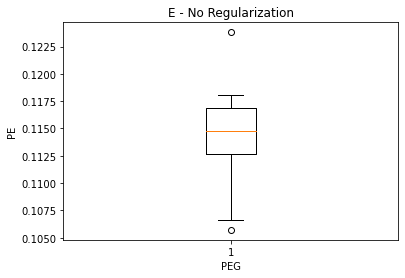

In [23]:
def DNNfit(Xtrain, ytrain):  
    
    Nfeatures = Xtrain.shape[1]   # number of columns minus label
    Nlayers = 2 # int(input('Number of Hidden layers= '))
    Nnodes = 50 # int(input('Number of nodes/layer= '))
    Nepochs = 100
    
    model = Sequential()
# first hidden layer
    model.add(Dense(Nnodes,  input_dim=Nfeatures, activation='relu'))  # output layer
# additional hidden layers    
    for n in range(Nlayers-1):  # first hidden layer is previous statement
        model.add(Dense(Nnodes, activation='relu'))
    model.add(Dense(10, activation='softmax')) 
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', metrics=['accuracy'])    
    ytrain_onehot = to_categorical(ytrain)
    history = model.fit(Xtrain, ytrain_onehot, 
                  validation_split= .3, 
                  epochs = Nepochs, verbose=0)
    return model, history
 
Nrestarts = 10
PEG_vals_no = np.zeros(Nrestarts)

for restart in range(Nrestarts):

    model, history = DNNfit(Xtrain, ytrain)
    Nerr, Ntotal,CM, PEG = DNNevaluate(model,Xtest,ytest) 
    PEG_vals_no[restart] = PEG
    

    Nerr, Ntotal, CM, PE = DNNevaluate(model,Xtest,ytest)
    print('\n' + Language + 'DB Restart=  %2d PEG= %.4f' % (restart,PE))
    
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(PEG_vals_no)
ax.set_title(Language + ' - No Regularization')
ax.set_xlabel('PEG')
ax.set_ylabel('PE')
plt.show()    

In [29]:
# Calculate min, lower box, median, upper box, max
print(np.min(PEG_vals_no),
      np.quantile(PEG_vals_no, [0.25, 0.5, 0.75]),
      np.max(PEG_vals_no))

0.10571428571428572 [0.11261905 0.1147619  0.11690476] 0.12380952380952381


## Weight Size Regularization

In [3]:
# import activity regularizer
from keras.regularizers import l2  # l1: sum of absolute values  l2: sum of squares  


EDB Restart=   0 PEG= 0.1200

EDB Restart=   1 PEG= 0.1143

EDB Restart=   2 PEG= 0.1210

EDB Restart=   3 PEG= 0.1143

EDB Restart=   4 PEG= 0.1362

EDB Restart=   5 PEG= 0.1162

EDB Restart=   6 PEG= 0.1400

EDB Restart=   7 PEG= 0.1238

EDB Restart=   8 PEG= 0.1210

EDB Restart=   9 PEG= 0.1400


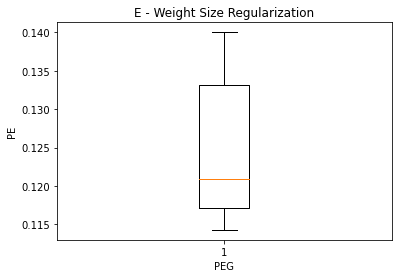

In [30]:
def DNNfit(Xtrain, ytrain):  
    
    Nfeatures = Xtrain.shape[1]   # number of columns minus label
    Nlayers = 2 # int(input('Number of Hidden layers= '))
    Nnodes = 50 # int(input('Number of nodes/layer= '))
    Nepochs = 100
    
    model = Sequential()
# first hidden layer
    model.add(Dense(Nnodes,  input_dim=Nfeatures, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))  # output layer
# additional hidden layers    
    for n in range(Nlayers-1):  # first hidden layer is previous statement
        model.add(Dense(Nnodes, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))  # output layer
    model.add(Dense(10, activation='softmax'))     
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', metrics=['accuracy'])    
    ytrain_onehot = to_categorical(ytrain)
    history = model.fit(Xtrain, ytrain_onehot, 
                  validation_split= .3, 
                  epochs = Nepochs, verbose=0)
    return model, history
 
Nrestarts = 10
PEG_vals_size = np.zeros(Nrestarts)

for restart in range(Nrestarts):

    model, history = DNNfit(Xtrain, ytrain)
    
    # evaluate PEG
    Nerr, Ntotal,CM, PEG = DNNevaluate(model,Xtest,ytest) 
    PEG_vals_size[restart] = PEG
    

    Nerr, Ntotal, CM, PE = DNNevaluate(model,Xtest,ytest)
    print('\n' + Language + 'DB Restart=  %2d PEG= %.4f' % (restart,PE))
    
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(PEG_vals_size)
ax.set_title(Language + ' - Weight Size Regularization')
ax.set_xlabel('PEG')
ax.set_ylabel('PE')
plt.show()

In [31]:
# Calculate min, lower box, median, upper box, max
print(np.min(PEG_vals_size),
      np.quantile(PEG_vals_size, [0.25, 0.5, 0.75]),
      np.max(PEG_vals_size))

0.11428571428571428 [0.11714286 0.12095238 0.13309524] 0.14


## Train activity

In [4]:
# import activity regularizer
from keras.regularizers import l1
# instantiate regularizer
reg = l1(0.001)


EDB Restart=   0 PEG= 0.1000

EDB Restart=   1 PEG= 0.1124

EDB Restart=   2 PEG= 0.0971

EDB Restart=   3 PEG= 0.0990

EDB Restart=   4 PEG= 0.1067

EDB Restart=   5 PEG= 0.1019

EDB Restart=   6 PEG= 0.1010

EDB Restart=   7 PEG= 0.1105

EDB Restart=   8 PEG= 0.1152

EDB Restart=   9 PEG= 0.1057


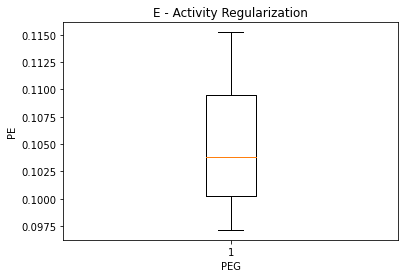

In [34]:
def DNNfit(Xtrain, ytrain):  
    
    Nfeatures = Xtrain.shape[1]   # number of columns minus label
    Nlayers = 2 # int(input('Number of Hidden layers= '))
    Nnodes = 50 # int(input('Number of nodes/layer= '))
    Nepochs = 100
    
    model = Sequential()
# first hidden layer
    model.add(Dense(Nnodes, input_dim=Nfeatures, activation='relu', activity_regularizer=l1(0.001)))
# additional hidden layers    
    for n in range(Nlayers-1):  # first hidden layer is previous statement
        model.add(Dense(Nnodes, activation='relu', activity_regularizer=l1(0.001)))
  # output layer
    model.add(Dense(10, activation='softmax'))     
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', metrics=['accuracy'])    
    ytrain_onehot = to_categorical(ytrain)
    history = model.fit(Xtrain, ytrain_onehot, 
                  validation_split= .3, 
                  epochs = Nepochs, verbose=0)
    return model, history

Nrestarts = 10
PEG_vals_act = np.zeros(Nrestarts)

for restart in range(Nrestarts):

    model, history = DNNfit(Xtrain, ytrain)
 
    # evaluate PEG
    Nerr, Ntotal,CM, PEG = DNNevaluate(model,Xtest,ytest) 
    PEG_vals_act[restart] = PEG
    

    Nerr, Ntotal, CM, PE = DNNevaluate(model,Xtest,ytest)
    print('\n' + Language + 'DB Restart=  %2d PEG= %.4f' % (restart,PE))
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(PEG_vals_act)
ax.set_title(Language + ' - Activity Regularization')
ax.set_xlabel('PEG')
ax.set_ylabel('PE')
plt.show()

In [35]:
# Calculate min, lower box, median, upper box, max
print(np.min(PEG_vals_act),
      np.quantile(PEG_vals_act, [0.25, 0.5, 0.75]),
      np.max(PEG_vals_act))

0.09714285714285714 [0.1002381  0.10380952 0.10952381] 0.11523809523809524


## Weight constraint

In [12]:
# import activity regularizer
from keras.constraints import max_norm


EDB Restart=   0 PEG= 0.1124

EDB Restart=   1 PEG= 0.1133

EDB Restart=   2 PEG= 0.1143

EDB Restart=   3 PEG= 0.1210

EDB Restart=   4 PEG= 0.1105

EDB Restart=   5 PEG= 0.1143

EDB Restart=   6 PEG= 0.1162

EDB Restart=   7 PEG= 0.1162

EDB Restart=   8 PEG= 0.1143

EDB Restart=   9 PEG= 0.1229


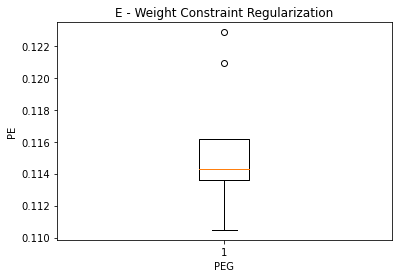

In [36]:
def DNNfit(Xtrain, ytrain):  
    
    Nfeatures = Xtrain.shape[1]   # number of columns minus label
    Nlayers = 2 # int(input('Number of Hidden layers= '))
    Nnodes = 50 # int(input('Number of nodes/layer= '))
    Nepochs = 100
    
    model = Sequential()
# first hidden layer
    model.add(Dense(Nnodes, input_dim=Nfeatures, activation='relu', bias_constraint=max_norm(3), kernel_constraint=max_norm(3)))
# additional hidden layers    
    for n in range(Nlayers-1):  # first hidden layer is previous statement
        model.add(Dense(Nnodes, activation='relu', bias_constraint=max_norm(3), kernel_constraint=max_norm(3)))
  # output layer
    model.add(Dense(10, activation='softmax'))     
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', metrics=['accuracy'])    
    ytrain_onehot = to_categorical(ytrain)
    history = model.fit(Xtrain, ytrain_onehot, 
                  validation_split= .3, 
                  epochs = Nepochs, verbose=0)
    return model, history

Nrestarts = 10
PEG_vals_cons = np.zeros(Nrestarts)

for restart in range(Nrestarts):

    model, history = DNNfit(Xtrain, ytrain)    
    # evaluate PEG
    Nerr, Ntotal,CM, PEG = DNNevaluate(model,Xtest,ytest) 
    PEG_vals_cons[restart] = PEG
    

    Nerr, Ntotal, CM, PE = DNNevaluate(model,Xtest,ytest)
    print('\n' + Language + 'DB Restart=  %2d PEG= %.4f' % (restart,PE))
    
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(PEG_vals_cons)
ax.set_title(Language + ' - Weight Constraint Regularization')
ax.set_xlabel('PEG')
ax.set_ylabel('PE')
plt.show()

In [37]:
# Calculate min, lower box, median, upper box, max
print(np.min(PEG_vals_cons),
      np.quantile(PEG_vals_cons, [0.25, 0.5, 0.75]),
      np.max(PEG_vals_cons))

0.11047619047619048 [0.11357143 0.11428571 0.11619048] 0.12285714285714286


## Dropout

In [14]:
from keras.layers import Dropout


EDB Restart=   0 PEG= 0.1029

EDB Restart=   1 PEG= 0.1210

EDB Restart=   2 PEG= 0.1048

EDB Restart=   3 PEG= 0.1200

EDB Restart=   4 PEG= 0.1124

EDB Restart=   5 PEG= 0.1267

EDB Restart=   6 PEG= 0.1019

EDB Restart=   7 PEG= 0.1181

EDB Restart=   8 PEG= 0.1114

EDB Restart=   9 PEG= 0.1067


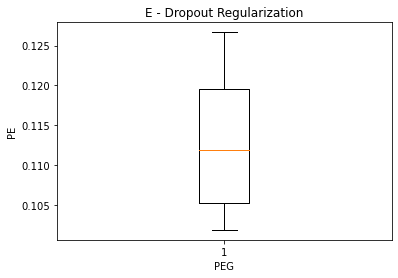

In [38]:
def DNNfit(Xtrain, ytrain):  
    
    Nfeatures = Xtrain.shape[1]   # number of columns minus label
    Nlayers = 2 # int(input('Number of Hidden layers= '))
    Nnodes = 50 # int(input('Number of nodes/layer= '))
    Nepochs = 100
    
    model = Sequential()
# first hidden layer
    model.add(Dense(Nnodes, input_dim=Nfeatures, activation='relu'))
# additional hidden layers    
    for n in range(Nlayers-1):  # first hidden layer is previous statement
        model.add(Dense(Nnodes, activation='relu'))
        
        model.add(Dropout(0.4))

  # output layer
    model.add(Dense(10, activation='softmax'))     
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', metrics=['accuracy'])    
    ytrain_onehot = to_categorical(ytrain)
    history = model.fit(Xtrain, ytrain_onehot, 
                  validation_split= .3, 
                  epochs = Nepochs, verbose=0)
    return model, history

Nrestarts = 10
PEG_vals_drop = np.zeros(Nrestarts)

for restart in range(Nrestarts):
    model, history = DNNfit(Xtrain, ytrain)
    Nerr, Ntotal,CM, PEG = DNNevaluate(model,Xtest,ytest) 
    PEG_vals_drop[restart] = PEG
    Nerr, Ntotal, CM, PE = DNNevaluate(model,Xtest,ytest)
    print('\n' + Language + 'DB Restart=  %2d PEG= %.4f' % (restart,PE))
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(PEG_vals_drop)
ax.set_title(Language + ' - Dropout Regularization')
ax.set_xlabel('PEG')
ax.set_ylabel('PE')
plt.show()    


In [39]:
# Calculate min, lower box, median, upper box, max
print(np.min(PEG_vals_drop),
      np.quantile(PEG_vals_drop, [0.25, 0.5, 0.75]),
      np.max(PEG_vals_drop))

0.1019047619047619 [0.1052381  0.11190476 0.11952381] 0.12666666666666668


## Adding noise

In [16]:
from keras.layers import GaussianNoise


EDB Restart=   0 PEG= 0.1086

EDB Restart=   1 PEG= 0.1181

EDB Restart=   2 PEG= 0.1133

EDB Restart=   3 PEG= 0.1114

EDB Restart=   4 PEG= 0.1152

EDB Restart=   5 PEG= 0.1152

EDB Restart=   6 PEG= 0.1162

EDB Restart=   7 PEG= 0.1038

EDB Restart=   8 PEG= 0.1105

EDB Restart=   9 PEG= 0.1095


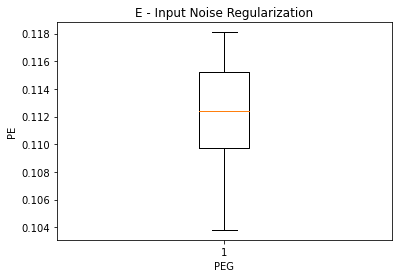

In [40]:
def DNNfit(Xtrain, ytrain):  
    
    Nfeatures = Xtrain.shape[1]   # number of columns minus label
    Nlayers = 2 # int(input('Number of Hidden layers= '))
    Nnodes = 50 # int(input('Number of nodes/layer= '))
    Nepochs = 100
    
    model = Sequential()
    model.add(GaussianNoise(0.01, input_shape=(784,)))
    model.add(Dense(Nnodes, input_dim=Nfeatures, activation='relu'))
# additional hidden layers    
    for n in range(Nlayers-1):  # first hidden layer is previous statement
        model.add(Dense(Nnodes, activation='relu'))
  # output layer
    model.add(Dense(10, activation='softmax'))     
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', metrics=['accuracy'])    
    ytrain_onehot = to_categorical(ytrain)
    history = model.fit(Xtrain, ytrain_onehot, 
                  validation_split= .3, 
                  epochs = Nepochs, verbose=0)
    return model, history

Nrestarts = 10
PEG_vals_add = np.zeros(Nrestarts)

for restart in range(Nrestarts):
    model, history = DNNfit(Xtrain, ytrain)
    Nerr, Ntotal,CM, PEG = DNNevaluate(model,Xtest,ytest) 
    PEG_vals_add[restart] = PEG
    Nerr, Ntotal, CM, PE = DNNevaluate(model,Xtest,ytest)
    print('\n' + Language + 'DB Restart=  %2d PEG= %.4f' % (restart,PE))
    
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(PEG_vals_add)
ax.set_title(Language + ' - Input Noise Regularization')
ax.set_xlabel('PEG')
ax.set_ylabel('PE')
plt.show()

In [41]:
# Calculate min, lower box, median, upper box, max
print(np.min(PEG_vals_add),
      np.quantile(PEG_vals_add, [0.25, 0.5, 0.75]),
      np.max(PEG_vals_add))

0.10380952380952381 [0.1097619  0.11238095 0.1152381 ] 0.1180952380952381


## Early stopping

In [18]:
from keras.callbacks import EarlyStopping

Epoch 00004: early stopping

EDB Restart=   0 PEG= 0.1067
Epoch 00002: early stopping

EDB Restart=   1 PEG= 0.1095
Epoch 00006: early stopping

EDB Restart=   2 PEG= 0.1095
Epoch 00004: early stopping

EDB Restart=   3 PEG= 0.1143
Epoch 00002: early stopping

EDB Restart=   4 PEG= 0.1267
Epoch 00002: early stopping

EDB Restart=   5 PEG= 0.1076
Epoch 00005: early stopping

EDB Restart=   6 PEG= 0.1152
Epoch 00002: early stopping

EDB Restart=   7 PEG= 0.1105
Epoch 00002: early stopping

EDB Restart=   8 PEG= 0.1152
Epoch 00005: early stopping

EDB Restart=   9 PEG= 0.1143


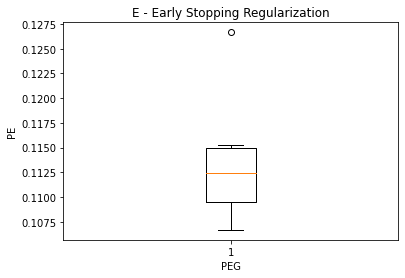

In [42]:
def DNNfit(Xtrain, ytrain):  
    
    Nfeatures = Xtrain.shape[1]   # number of columns minus label
    Nlayers = 2 # int(input('Number of Hidden layers= '))
    Nnodes = 50 # int(input('Number of nodes/layer= '))
    Nepochs = 100
    model = Sequential()
    model.add(Dense(Nnodes, input_dim=Nfeatures, activation='relu'))
    for n in range(Nlayers-1):  # first hidden layer is previous statement
        model.add(Dense(Nnodes, activation='relu'))
  # output layer
    model.add(Dense(10, activation='softmax'))     
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', metrics=['accuracy'])    
    ytrain_onehot = to_categorical(ytrain)
    model.fit(Xtrain, ytrain_onehot,    # initially fit without ES
                  validation_split= .3, 
                  epochs = 50,
                  verbose=0)
    
  # simple early stopping
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
    
    history = model.fit(Xtrain, ytrain_onehot, 
                  validation_split= .3, 
                  epochs = 10*Nepochs,
                  callbacks = [es],
                  verbose=0)
    return model, history

Nrestarts = 10
PEG_vals_stop = np.zeros(Nrestarts)

for restart in range(Nrestarts):

    model, history = DNNfit(Xtrain, ytrain)
    Nerr, Ntotal,CM, PEG = DNNevaluate(model,Xtest,ytest) 
    PEG_vals_stop[restart] = PEG
    Nerr, Ntotal, CM, PE = DNNevaluate(model,Xtest,ytest)
    print('\n' + Language + 'DB Restart=  %2d PEG= %.4f' % (restart,PE))
    
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(PEG_vals_stop)
ax.set_title(Language + ' - Early Stopping Regularization')
ax.set_xlabel('PEG')
ax.set_ylabel('PE')
plt.show()

In [43]:
# Calculate min, lower box, median, upper box, max
print(np.min(PEG_vals_stop),
      np.quantile(PEG_vals_stop, [0.25, 0.5, 0.75]),
      np.max(PEG_vals_stop))

0.10666666666666667 [0.10952381 0.11238095 0.115     ] 0.12666666666666668


**Table 8.2: Regularization results for English spoken digits.**

|                 | Min PEG | Lower Box PEG | Median PEG | Upper Box PEG | Max PEG
|----             | -----   | ---           | -----      |    ----       | ---    
|No Reg           |0.1057   |0.1126         |0.1147      | 0.1169        |0.1238
|Weight Size      |0.1142   |0.1171         |0.1209      | 0.1330        |0.14
|Train activity   |0.0971   |0.1002         |0.1038      |   0.1095      |0.1152
|Weight constraint|0.1104   |0.1135         |0.1142      | 0.1161        |0.1228
|Dropout          |0.1019   |0.1052         |0.1119      | 0.1195        |0.1266
|Adding noise     |0.1038   |0.1097         |0.1123      | 0.1152        |0.1180
|Early stopping   |0.1066   |0.1095         |0.1123      | 0.115         |0.1266

**Import dataset of Chinese digits**

In [44]:
print('\nDNN_CDB_Spectrogram')
Language = input('Enter Chinese (C) or English (E)  ')
filename = Language + 'DB.csv'
dataset = np.loadtxt(filename, delimiter=',',dtype=float)
np.random.shuffle(dataset)
print('dataset shape= ',dataset.shape)
X = dataset[:,1:785]
y = dataset[:,0]

# split into train and test sets
rows = y.shape[0]
n_train = int(.5*rows)  # 50% of data into training set  25% into validation set
Xtrain, Xtest = X[:n_train, :], X[n_train:, :]
ytrain, ytest = y[:n_train], y[n_train:]


DNN_CDB_Spectrogram
Enter Chinese (C) or English (E)  C
dataset shape=  (2100, 785)


## No Regularization – Chinese digits


CDB Restart=   0 PEG= 0.1695

CDB Restart=   1 PEG= 0.1686

CDB Restart=   2 PEG= 0.1648

CDB Restart=   3 PEG= 0.1505

CDB Restart=   4 PEG= 0.1610

CDB Restart=   5 PEG= 0.1467

CDB Restart=   6 PEG= 0.1524

CDB Restart=   7 PEG= 0.1619

CDB Restart=   8 PEG= 0.1610

CDB Restart=   9 PEG= 0.1486


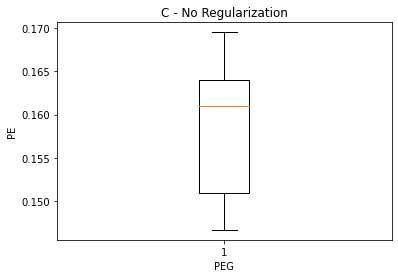

In [45]:
def DNNfit(Xtrain, ytrain):  
    
    Nfeatures = Xtrain.shape[1]   # number of columns minus label
    Nlayers = 2 # int(input('Number of Hidden layers= '))
    Nnodes = 50 # int(input('Number of nodes/layer= '))
    Nepochs = 100
    
    model = Sequential()
# first hidden layer
    model.add(Dense(Nnodes,  input_dim=Nfeatures, activation='relu'))  # output layer
# additional hidden layers    
    for n in range(Nlayers-1):  # first hidden layer is previous statement
        model.add(Dense(Nnodes, activation='relu'))
    model.add(Dense(10, activation='softmax')) 
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', metrics=['accuracy'])    
    ytrain_onehot = to_categorical(ytrain)
    history = model.fit(Xtrain, ytrain_onehot, 
                  validation_split= .3, 
                  epochs = Nepochs, verbose=0)
    return model, history
 
Nrestarts = 10
PEG_vals_no = np.zeros(Nrestarts)

for restart in range(Nrestarts):

    model, history = DNNfit(Xtrain, ytrain)
    Nerr, Ntotal,CM, PEG = DNNevaluate(model,Xtest,ytest) 
    PEG_vals_no[restart] = PEG
    

    Nerr, Ntotal, CM, PE = DNNevaluate(model,Xtest,ytest)
    print('\n' + Language + 'DB Restart=  %2d PEG= %.4f' % (restart,PE))
    
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(PEG_vals_no)
ax.set_title(Language + ' - No Regularization')
ax.set_xlabel('PEG')
ax.set_ylabel('PE')
plt.show()      

In [46]:
# Calculate min, lower box, median, upper box, max
print(np.min(PEG_vals_no),
      np.quantile(PEG_vals_no, [0.25, 0.5, 0.75]),
      np.max(PEG_vals_no))

0.14666666666666667 [0.15095238 0.16095238 0.16404762] 0.16952380952380952


## Weight Size Regularization – Chinese Digits


CDB Restart=   0 PEG= 0.2143

CDB Restart=   1 PEG= 0.1705

CDB Restart=   2 PEG= 0.1733

CDB Restart=   3 PEG= 0.1781

CDB Restart=   4 PEG= 0.1724

CDB Restart=   5 PEG= 0.1752

CDB Restart=   6 PEG= 0.1676

CDB Restart=   7 PEG= 0.1638

CDB Restart=   8 PEG= 0.1829

CDB Restart=   9 PEG= 0.1657


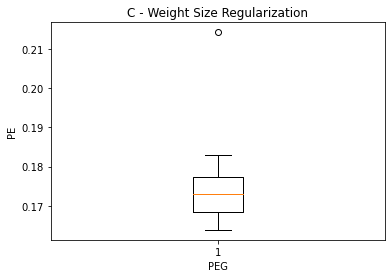

In [47]:
def DNNfit(Xtrain, ytrain):  
    
    Nfeatures = Xtrain.shape[1]   # number of columns minus label
    Nlayers = 2 # int(input('Number of Hidden layers= '))
    Nnodes = 50 # int(input('Number of nodes/layer= '))
    Nepochs = 100
    
    model = Sequential()
# first hidden layer
    model.add(Dense(Nnodes,  input_dim=Nfeatures, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))  # output layer
# additional hidden layers    
    for n in range(Nlayers-1):  # first hidden layer is previous statement
        model.add(Dense(Nnodes, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))  # output layer
    model.add(Dense(10, activation='softmax'))     
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', metrics=['accuracy'])    
    ytrain_onehot = to_categorical(ytrain)
    history = model.fit(Xtrain, ytrain_onehot, 
                  validation_split= .3, 
                  epochs = Nepochs, verbose=0)
    return model, history
 
Nrestarts = 10
PEG_vals_size = np.zeros(Nrestarts)

for restart in range(Nrestarts):

    model, history = DNNfit(Xtrain, ytrain)
    
    # evaluate PEG
    Nerr, Ntotal,CM, PEG = DNNevaluate(model,Xtest,ytest) 
    PEG_vals_size[restart] = PEG
    

    Nerr, Ntotal, CM, PE = DNNevaluate(model,Xtest,ytest)
    print('\n' + Language + 'DB Restart=  %2d PEG= %.4f' % (restart,PE))
    
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(PEG_vals_size)
ax.set_title(Language + ' - Weight Size Regularization')
ax.set_xlabel('PEG')
ax.set_ylabel('PE')
plt.show()

In [48]:
# Calculate min, lower box, median, upper box, max
print(np.min(PEG_vals_size),
      np.quantile(PEG_vals_size, [0.25, 0.5, 0.75]),
      np.max(PEG_vals_size))

0.16380952380952382 [0.16833333 0.17285714 0.17738095] 0.21428571428571427


## Activity Regularization – Chinese Digits


CDB Restart=   0 PEG= 0.1648

CDB Restart=   1 PEG= 0.1562

CDB Restart=   2 PEG= 0.1629

CDB Restart=   3 PEG= 0.1467

CDB Restart=   4 PEG= 0.1590

CDB Restart=   5 PEG= 0.1524

CDB Restart=   6 PEG= 0.1590

CDB Restart=   7 PEG= 0.1600

CDB Restart=   8 PEG= 0.1514

CDB Restart=   9 PEG= 0.1657


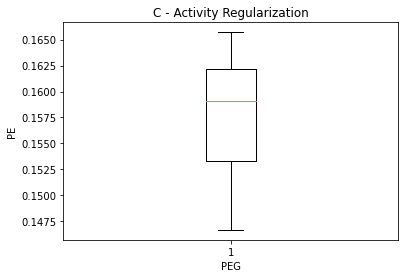

In [49]:
def DNNfit(Xtrain, ytrain):  
    
    Nfeatures = Xtrain.shape[1]   # number of columns minus label
    Nlayers = 2 # int(input('Number of Hidden layers= '))
    Nnodes = 50 # int(input('Number of nodes/layer= '))
    Nepochs = 100
    
    model = Sequential()
# first hidden layer
    model.add(Dense(Nnodes, input_dim=Nfeatures, activation='relu', activity_regularizer=l1(0.001)))
# additional hidden layers    
    for n in range(Nlayers-1):  # first hidden layer is previous statement
        model.add(Dense(Nnodes, activation='relu', activity_regularizer=l1(0.001)))
  # output layer
    model.add(Dense(10, activation='softmax'))     
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', metrics=['accuracy'])    
    ytrain_onehot = to_categorical(ytrain)
    history = model.fit(Xtrain, ytrain_onehot, 
                  validation_split= .3, 
                  epochs = Nepochs, verbose=0)
    return model, history

Nrestarts = 10
PEG_vals_act = np.zeros(Nrestarts)

for restart in range(Nrestarts):

    model, history = DNNfit(Xtrain, ytrain)
 
    # evaluate PEG
    Nerr, Ntotal,CM, PEG = DNNevaluate(model,Xtest,ytest) 
    PEG_vals_act[restart] = PEG
    

    Nerr, Ntotal, CM, PE = DNNevaluate(model,Xtest,ytest)
    print('\n' + Language + 'DB Restart=  %2d PEG= %.4f' % (restart,PE))
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(PEG_vals_act)
ax.set_title(Language + ' - Activity Regularization')
ax.set_xlabel('PEG')
ax.set_ylabel('PE')
plt.show()

In [50]:
# Calculate min, lower box, median, upper box, max
print(np.min(PEG_vals_act),
      np.quantile(PEG_vals_act, [0.25, 0.5, 0.75]),
      np.max(PEG_vals_act))

0.14666666666666667 [0.15333333 0.15904762 0.16214286] 0.1657142857142857


## Weight Constraint Regularization – Chinese Digits


CDB Restart=   0 PEG= 0.1629

CDB Restart=   1 PEG= 0.1524

CDB Restart=   2 PEG= 0.1676

CDB Restart=   3 PEG= 0.1581

CDB Restart=   4 PEG= 0.1581

CDB Restart=   5 PEG= 0.1667

CDB Restart=   6 PEG= 0.1619

CDB Restart=   7 PEG= 0.1476

CDB Restart=   8 PEG= 0.1581

CDB Restart=   9 PEG= 0.1533


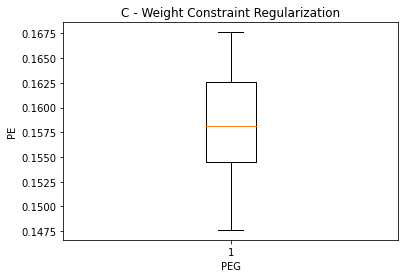

In [51]:
def DNNfit(Xtrain, ytrain):  
    
    Nfeatures = Xtrain.shape[1]   # number of columns minus label
    Nlayers = 2 # int(input('Number of Hidden layers= '))
    Nnodes = 50 # int(input('Number of nodes/layer= '))
    Nepochs = 100
    
    model = Sequential()
# first hidden layer
    model.add(Dense(Nnodes, input_dim=Nfeatures, activation='relu', bias_constraint=max_norm(3), kernel_constraint=max_norm(3)))
# additional hidden layers    
    for n in range(Nlayers-1):  # first hidden layer is previous statement
        model.add(Dense(Nnodes, activation='relu', bias_constraint=max_norm(3), kernel_constraint=max_norm(3)))
  # output layer
    model.add(Dense(10, activation='softmax'))     
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', metrics=['accuracy'])    
    ytrain_onehot = to_categorical(ytrain)
    history = model.fit(Xtrain, ytrain_onehot, 
                  validation_split= .3, 
                  epochs = Nepochs, verbose=0)
    return model, history

Nrestarts = 10
PEG_vals_cons = np.zeros(Nrestarts)

for restart in range(Nrestarts):

    model, history = DNNfit(Xtrain, ytrain)    
    # evaluate PEG
    Nerr, Ntotal,CM, PEG = DNNevaluate(model,Xtest,ytest) 
    PEG_vals_cons[restart] = PEG
    

    Nerr, Ntotal, CM, PE = DNNevaluate(model,Xtest,ytest)
    print('\n' + Language + 'DB Restart=  %2d PEG= %.4f' % (restart,PE))
    
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(PEG_vals_cons)
ax.set_title(Language + ' - Weight Constraint Regularization')
ax.set_xlabel('PEG')
ax.set_ylabel('PE')
plt.show()

In [52]:
# Calculate min, lower box, median, upper box, max
print(np.min(PEG_vals_cons),
      np.quantile(PEG_vals_cons, [0.25, 0.5, 0.75]),
      np.max(PEG_vals_cons))

0.14761904761904762 [0.15452381 0.15809524 0.16261905] 0.1676190476190476


## Dropout Regularization – Chinese Digits


CDB Restart=   0 PEG= 0.1552

CDB Restart=   1 PEG= 0.1638

CDB Restart=   2 PEG= 0.1486

CDB Restart=   3 PEG= 0.1571

CDB Restart=   4 PEG= 0.1571

CDB Restart=   5 PEG= 0.1600

CDB Restart=   6 PEG= 0.1743

CDB Restart=   7 PEG= 0.1514

CDB Restart=   8 PEG= 0.1571

CDB Restart=   9 PEG= 0.1581


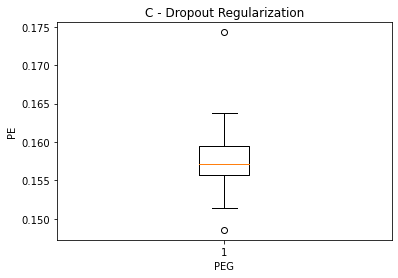

In [53]:
def DNNfit(Xtrain, ytrain):  
    
    Nfeatures = Xtrain.shape[1]   # number of columns minus label
    Nlayers = 2 # int(input('Number of Hidden layers= '))
    Nnodes = 50 # int(input('Number of nodes/layer= '))
    Nepochs = 100
    
    model = Sequential()
# first hidden layer
    model.add(Dense(Nnodes, input_dim=Nfeatures, activation='relu'))
# additional hidden layers    
    for n in range(Nlayers-1):  # first hidden layer is previous statement
        model.add(Dense(Nnodes, activation='relu'))
        
        model.add(Dropout(0.4))

  # output layer
    model.add(Dense(10, activation='softmax'))     
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', metrics=['accuracy'])    
    ytrain_onehot = to_categorical(ytrain)
    history = model.fit(Xtrain, ytrain_onehot, 
                  validation_split= .3, 
                  epochs = Nepochs, verbose=0)
    return model, history

Nrestarts = 10
PEG_vals_drop = np.zeros(Nrestarts)

for restart in range(Nrestarts):
    model, history = DNNfit(Xtrain, ytrain)
    Nerr, Ntotal,CM, PEG = DNNevaluate(model,Xtest,ytest) 
    PEG_vals_drop[restart] = PEG
    Nerr, Ntotal, CM, PE = DNNevaluate(model,Xtest,ytest)
    print('\n' + Language + 'DB Restart=  %2d PEG= %.4f' % (restart,PE))
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(PEG_vals_drop)
ax.set_title(Language + ' - Dropout Regularization')
ax.set_xlabel('PEG')
ax.set_ylabel('PE')
plt.show()

In [54]:
# Calculate min, lower box, median, upper box, max
print(np.min(PEG_vals_drop),
      np.quantile(PEG_vals_drop, [0.25, 0.5, 0.75]),
      np.max(PEG_vals_drop))

0.14857142857142858 [0.15571429 0.15714286 0.15952381] 0.1742857142857143


## Input Noise Regularization – Chinese Digits


CDB Restart=   0 PEG= 0.1610

CDB Restart=   1 PEG= 0.1524

CDB Restart=   2 PEG= 0.1667

CDB Restart=   3 PEG= 0.1714

CDB Restart=   4 PEG= 0.1600

CDB Restart=   5 PEG= 0.1619

CDB Restart=   6 PEG= 0.1562

CDB Restart=   7 PEG= 0.1457

CDB Restart=   8 PEG= 0.1705

CDB Restart=   9 PEG= 0.1524


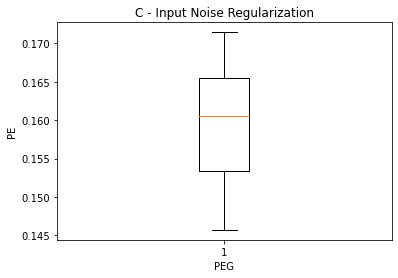

In [55]:
def DNNfit(Xtrain, ytrain):  
    
    Nfeatures = Xtrain.shape[1]   # number of columns minus label
    Nlayers = 2 # int(input('Number of Hidden layers= '))
    Nnodes = 50 # int(input('Number of nodes/layer= '))
    Nepochs = 100
    
    model = Sequential()
    model.add(GaussianNoise(0.01, input_shape=(784,)))
    model.add(Dense(Nnodes, input_dim=Nfeatures, activation='relu'))
# additional hidden layers    
    for n in range(Nlayers-1):  # first hidden layer is previous statement
        model.add(Dense(Nnodes, activation='relu'))
  # output layer
    model.add(Dense(10, activation='softmax'))     
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', metrics=['accuracy'])    
    ytrain_onehot = to_categorical(ytrain)
    history = model.fit(Xtrain, ytrain_onehot, 
                  validation_split= .3, 
                  epochs = Nepochs, verbose=0)
    return model, history

Nrestarts = 10
PEG_vals_add = np.zeros(Nrestarts)

for restart in range(Nrestarts):
    model, history = DNNfit(Xtrain, ytrain)
    Nerr, Ntotal,CM, PEG = DNNevaluate(model,Xtest,ytest) 
    PEG_vals_add[restart] = PEG
    Nerr, Ntotal, CM, PE = DNNevaluate(model,Xtest,ytest)
    print('\n' + Language + 'DB Restart=  %2d PEG= %.4f' % (restart,PE))
    
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(PEG_vals_add)
ax.set_title(Language + ' - Input Noise Regularization')
ax.set_xlabel('PEG')
ax.set_ylabel('PE')
plt.show()

In [56]:
# Calculate min, lower box, median, upper box, max
print(np.min(PEG_vals_add),
      np.quantile(PEG_vals_add, [0.25, 0.5, 0.75]),
      np.max(PEG_vals_add))

0.1457142857142857 [0.15333333 0.16047619 0.16547619] 0.17142857142857143


## Early Stopping Regularization

Epoch 00002: early stopping

CDB Restart=   0 PEG= 0.1771
Epoch 00002: early stopping

CDB Restart=   1 PEG= 0.1610
Epoch 00004: early stopping

CDB Restart=   2 PEG= 0.1600
Epoch 00003: early stopping

CDB Restart=   3 PEG= 0.1571
Epoch 00002: early stopping

CDB Restart=   4 PEG= 0.1743
Epoch 00002: early stopping

CDB Restart=   5 PEG= 0.1695
Epoch 00003: early stopping

CDB Restart=   6 PEG= 0.1752
Epoch 00002: early stopping

CDB Restart=   7 PEG= 0.1676
Epoch 00003: early stopping

CDB Restart=   8 PEG= 0.1771
Epoch 00002: early stopping

CDB Restart=   9 PEG= 0.1714


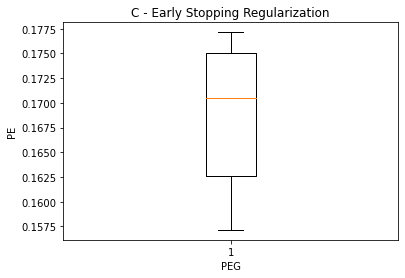

In [57]:
def DNNfit(Xtrain, ytrain):  
    
    Nfeatures = Xtrain.shape[1]   # number of columns minus label
    Nlayers = 2 # int(input('Number of Hidden layers= '))
    Nnodes = 50 # int(input('Number of nodes/layer= '))
    Nepochs = 100
    model = Sequential()
    model.add(Dense(Nnodes, input_dim=Nfeatures, activation='relu'))
    for n in range(Nlayers-1):  # first hidden layer is previous statement
        model.add(Dense(Nnodes, activation='relu'))
  # output layer
    model.add(Dense(10, activation='softmax'))     
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', metrics=['accuracy'])    
    ytrain_onehot = to_categorical(ytrain)
    model.fit(Xtrain, ytrain_onehot,    # initially fit without ES
                  validation_split= .3, 
                  epochs = 50,
                  verbose=0)
    
    # simple early stopping
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
    
    history = model.fit(Xtrain, ytrain_onehot, 
                  validation_split= .3, 
                  epochs = 10*Nepochs,
                  callbacks = [es],
                  verbose=0)
    return model, history

Nrestarts = 10
PEG_vals_stop = np.zeros(Nrestarts)

for restart in range(Nrestarts):

    model, history = DNNfit(Xtrain, ytrain)
    Nerr, Ntotal,CM, PEG = DNNevaluate(model,Xtest,ytest) 
    PEG_vals_stop[restart] = PEG
    Nerr, Ntotal, CM, PE = DNNevaluate(model,Xtest,ytest)
    print('\n' + Language + 'DB Restart=  %2d PEG= %.4f' % (restart,PE))
    
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(PEG_vals_stop)
ax.set_title(Language + ' - Early Stopping Regularization')
ax.set_xlabel('PEG')
ax.set_ylabel('PE')
plt.show()

In [58]:
# Calculate min, lower box, median, upper box, max
print(np.min(PEG_vals_stop),
      np.quantile(PEG_vals_stop, [0.25, 0.5, 0.75]),
      np.max(PEG_vals_stop))

0.15714285714285714 [0.16261905 0.17047619 0.175     ] 0.17714285714285713


**Table 8.1: Regularization results for Chinese spoken digits.**

|                 | Min PEG | Lower Box PEG | Median PEG | Upper Box PEG | Max PEG
|----             | -----   | ---           | -----      |    ----       | ---    
|No Reg           |0.1466   |0.1509         |0.1609      | 0.1640        |0.1695
|Weight Size      |0.1638   |0.1683         |0.1728      | 0.1773        |0.2142
|Train activity   |0.1466   |0.1533         |0.1590      | 0.1621        |0.1657
|Weight constraint|0.1476   |0.1545         |0.1580      | 0.1626        |0.1676
|Dropout          |0.1485   |0.1557         |0.1571      | 0.1595        |0.1742
|Adding noise     |0.1457   |0.1533         |0.1604      | 0.1654        |0.1714
|Early stopping   |0.1571   |0.1626         |0.1704      | 0.175         |0.1771

# Lec5 HW4 (advanced). Design the DNN and regularization(s) that reduce the P E G ≤ 0.1 for either Chinese of English spoken digits.

**Re-import English Digit Database**

In [73]:
print('\nDNN_CDB_Spectrogram')
Language = input('Enter Chinese (C) or English (E)  ')
filename = Language + 'DB.csv'
dataset = np.loadtxt(filename, delimiter=',',dtype=float)
np.random.shuffle(dataset)
print('dataset shape= ',dataset.shape)
X = dataset[:,1:785]
y = dataset[:,0]

# split into train and test sets
rows = y.shape[0]
n_train = int(.5*rows)  # 50% of data into training set  25% into validation set
Xtrain, Xtest = X[:n_train, :], X[n_train:, :]
ytrain, ytest = y[:n_train], y[n_train:]


DNN_CDB_Spectrogram
Enter Chinese (C) or English (E)  E
dataset shape=  (2100, 785)


## I used combination regularization of activity regularization and dropping out some nodes by randomly 0.1 probability. Lastly, I used early stopping by 80 epoches.

Epoch 00004: early stopping
Epoch 00004: early stopping
Epoch 00003: early stopping
Epoch 00003: early stopping
Epoch 00004: early stopping
Epoch 00003: early stopping
Epoch 00003: early stopping
Epoch 00002: early stopping
Epoch 00002: early stopping
Epoch 00003: early stopping
Epoch 00002: early stopping
Epoch 00002: early stopping
Epoch 00002: early stopping
Epoch 00002: early stopping
Epoch 00003: early stopping
Epoch 00003: early stopping
Epoch 00003: early stopping
Epoch 00002: early stopping
Epoch 00004: early stopping
Epoch 00003: early stopping


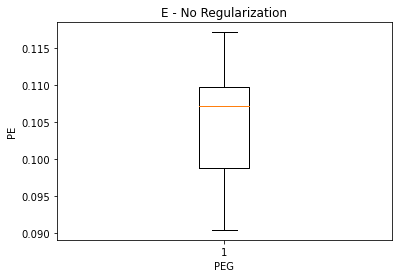

min PEG:  0.09047619047619047 
 25%, 50%, 75% PEG: [0.09880952 0.10714286 0.1097619 ] 
 max PEG:  0.11714285714285715


In [111]:
def DNNfit(Xtrain, ytrain):  
    
    Nfeatures = Xtrain.shape[1]   # number of columns minus label
    Nlayers = 2 # int(input('Number of Hidden layers= '))
    Nnodes = 100 # int(input('Number of nodes/layer= '))
    Nepochs = 100
    
    model = Sequential()
    # model.add(GaussianNoise(0.01, input_shape=(784,)))
    # first hidden layer
    model.add(Dense(Nnodes,  input_dim=Nfeatures, activation='relu', activity_regularizer=l1(0.001)))  # output layer
    # additional hidden layers    
    for n in range(Nlayers-1):  # first hidden layer is previous statement
        model.add(Dense(Nnodes, activation='relu', activity_regularizer=l1(0.001)))
        model.add(Dropout(0.1))
        
    model.add(Dense(10, activation='softmax')) 
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', metrics=['accuracy'])  
    
    # simple early stopping
    # es = EarlyStopping(monitor='val_loss', mode='min', verbose=0)
    
    ytrain_onehot = to_categorical(ytrain)
    model.fit(Xtrain, ytrain_onehot, 
                  validation_split= .3, 
                  epochs = 80, verbose=0)
    
    # simple early stopping
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
    
    history = model.fit(Xtrain, ytrain_onehot, 
                  validation_split= .3, 
                  epochs = 10*Nepochs,
                  callbacks = [es],
                  verbose=0)
    
    return model, history

Nrestarts = 20
PEG_vals = np.zeros(Nrestarts)

for restart in range(Nrestarts):

    model, history = DNNfit(Xtrain, ytrain)
    Nerr, Ntotal,CM, PEG = DNNevaluate(model,Xtest,ytest) 
    PEG_vals[restart] = PEG
    

    Nerr, Ntotal, CM, PE = DNNevaluate(model,Xtest,ytest)
    # print('\n' + Language + 'DB Restart=  %2d PEG= %.4f' % (restart,PE))
    

fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(PEG_vals)
ax.set_title(Language + ' - No Regularization')
ax.set_xlabel('PEG')
ax.set_ylabel('PE')
plt.show()

# Calculate min, lower box, median, upper box, max
print("min PEG: ", str(np.min(PEG_vals)), "\n",
      "25%, 50%, 75% PEG:", str(np.quantile(PEG_vals, [0.25, 0.5, 0.75])), "\n",
      "max PEG: ", np.max(PEG_vals))

**From this results, the min PEG = 0.0904 < 0.1, 25% quantile = 0.0988 is less than 0.1, 50% quantile and 75% quantile are very close to 0.1. Statistically I can think that PEG in this case is almost equal to 0.1.**